<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/week3_quiz_solution1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3 보조 자료 

## 자동차 연비 예측하기: 회귀 
1. 데이터셋 불러오기 

In [1]:
# 산점도 행렬을 그리기 위해 seaborn 패키지를 설치합니다
!pip install seaborn
import pathlib
import numpy as np 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.8.2


In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# MPG = 연비, Cylinders = 실린더 개수, Displacement = 배기량, Horseposer = 마력, Weight = 중량, Acceleration = 가속

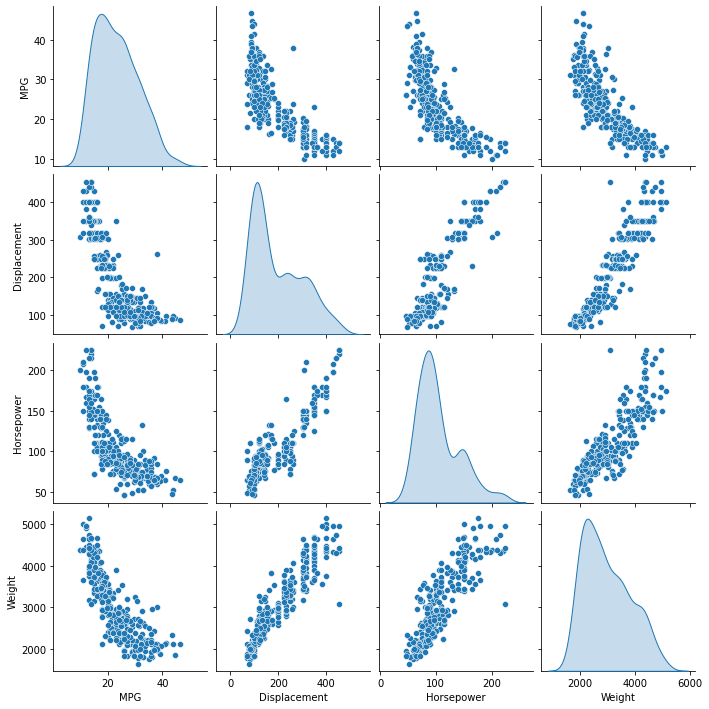

In [6]:
np.random.seed(999)
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Displacement", "Horsepower", "Weight"]], diag_kind="kde")

In [7]:
# train set에서 연비(mpg)) - 배기량(displacement), 무게(weight) - 마력(horsepower) 간의 회귀분석을 수행하여 최적의 직선을 찾고 testset의 샘플로 연비로 배기량을, 무게로 마력을 예측하시오.

In [8]:
mpg_train = train_dataset["MPG"]
displacement_train = train_dataset["Displacement"]
weight_train = train_dataset["Weight"]
horsepower_train = train_dataset["Horsepower"]

mpg_test = test_dataset["MPG"]
displacement_test = test_dataset["Displacement"]
weight_test = test_dataset["Weight"]
horsepower_test = test_dataset["Horsepower"]

mpg_train          :  (314,)
displacement_train :  (314,)


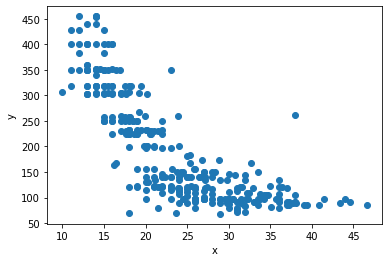

In [10]:
# Step1 : dataset 파악 
print("mpg_train          : ", np.shape(mpg_train))
print("displacement_train : ", np.shape(displacement_train))

plt.scatter (mpg_train, displacement_train) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
class Neuron:
  def __init__(self, w=1.0, b=1.0, lr=0.0001):
    self.w = w
    self.b = b 
    self.lr = lr
  
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat 

  def backprop(self, x, err):
    w_grad = x * err * self.lr
    b_grad = 1 * err * self.lr
    return w_grad, b_grad

  def fit(self, x, y, epochs=10000):
    for i in range(epochs+1):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad 
        self.b -= b_grad
      if i % 1000 == 0:
        print("Epoch {}: {}".format(i, err))

In [12]:
model1 = Neuron(w=-1.0, b=1.0, lr=1e-4)
model1.fit(mpg_train, displacement_train, epochs=10000)

Epoch 0: 79.87099394676375
Epoch 1000: 41.32552340481084
Epoch 2000: 39.632533109988856
Epoch 3000: 39.5581737609466
Epoch 4000: 39.55490775711564
Epoch 5000: 39.55476430802469
Epoch 6000: 39.55475800746774
Epoch 7000: 39.55475773073482
Epoch 8000: 39.55475771858045
Epoch 9000: 39.554757718055896
Epoch 10000: 39.55475771804612


In [13]:
model2 = Neuron(w=-1.0, b=1.0, lr=1e-5)
model2.fit(mpg_train, displacement_train, epochs=10000)

Epoch 0: 44.144353328002666
Epoch 1000: 65.32224453993953
Epoch 2000: 57.85510276898711
Epoch 3000: 52.38032499493676
Epoch 4000: 48.3663136644125
Epoch 5000: 45.423310746934106
Epoch 6000: 43.26555246996557
Epoch 7000: 41.68352183242314
Epoch 8000: 40.52360463278205
Epoch 9000: 39.67317362462319
Epoch 10000: 39.049652480302086


Text(0, 0.5, 'y')

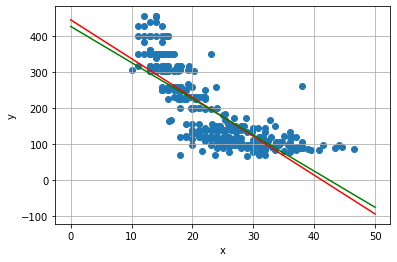

In [14]:
plt.scatter(mpg_train, displacement_train)
pt1 = (0, 0 * model1.w + model1.b)
pt2 = (50, 50 * model1.w + model1.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
pt1 = (0, 0 * model2.w + model2.b)
pt2 = (50, 50 * model2.w + model2.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'g')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')